## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to our first task: 'Dogs vs Cats'

We're going to try to create a model to enter the Dogs vs Cats competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): "State of the art: The current literature suggests machine classifiers can score above 80% accuracy on this task". So if we can beat 80%, then we will be at the cutting edge as of 2013!

In [1]:
# %reset

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [4]:
import sys

In [8]:
# in order to import libraries
sys.path.append("C:/Users/user/Documents/Salamat/fastai")

In [9]:
sys.path

['',
 'C:\\Users\\user\\Anaconda3\\envs\\fastai\\python36.zip',
 'C:\\Users\\user\\Anaconda3\\envs\\fastai\\DLLs',
 'C:\\Users\\user\\Anaconda3\\envs\\fastai\\lib',
 'C:\\Users\\user\\Anaconda3\\envs\\fastai',
 'C:\\Users\\user\\Anaconda3\\envs\\fastai\\lib\\site-packages',
 'C:\\Users\\user\\Anaconda3\\envs\\fastai\\lib\\site-packages\\cycler-0.10.0-py3.6.egg',
 'C:\\Users\\user\\Anaconda3\\envs\\fastai\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\user\\.ipython',
 'C:/Users/user/Documents/Salamat/fastai',
 'C:/Users/user/Documents/Salamat/fastai']

In [10]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [11]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [12]:
PATH = "C:/Users/user/Documents/Salamat"
sz=224

It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns `True` before you proceed. If you have problems with this, please check the FAQ and ask for help on [the forums](http://forums.fast.ai).

In [13]:
torch.cuda.is_available()

True

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return `True`, you may want to look into why.

In [14]:
torch.backends.cudnn.enabled

True

## First look at cat pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [17]:
os.listdir(PATH)

['ELO',
 'fastai',
 'Kaggle',
 'models',
 'NDSC_2019',
 'NDSC_2019train_beaty.csv',
 'NDSC_2019train_beauty.csv',
 'Programs',
 'tmp',
 'train_beauty.csv',
 'train_beauty2.csv']

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *dogs vs cats* model in 3 lines of code, and under 20 seconds:

In [34]:
#  @classmethod
#     def from_paths(cls, path, bs=64, tfms=(None,None), trn_name='train', val_name='valid', test_name=None, test_with_labels=False, num_workers=8):
#         """ Read in images and their labels given as sub-folder names

#         Arguments:
#             path: a root path of the data (used for storing trained models, precomputed values, etc)
#             bs: batch size
#             tfms: transformations (for data augmentations). e.g. output of `tfms_from_model`
#             trn_name: a name of the folder that contains training images.
#             val_name:  a name of the folder that contains validation images.
#             test_name:  a name of the folder that contains test images.
#             num_workers: number of workers

#         Returns:
#             ImageClassifierData
#         """
#         assert not(tfms[0] is None or tfms[1] is None), "please provide transformations for your train and validation sets"
#         trn,val = [folder_source(path, o) for o in (trn_name, val_name)]
#         if test_name:
#             test = folder_source(path, test_name) if test_with_labels else read_dir(path, test_name)
#         else: test = None
#         datasets = cls.get_ds(FilesIndexArrayDataset, trn, val, tfms, path=path, test=test)
#         return cls(path, datasets, bs, num_workers, classes=trn[2])

In [36]:
PATH='C:/Users/user/Documents/Salamat/NDSC_2019/beauty'
folder=''

'C:/Users/user/Documents/Salamat/NDSC_2019/beauty'

In [39]:
arch=resnet34

In [40]:
data_beauty = ImageClassifierData.from_paths(path=PATH,tfms=tfms_from_model(arch, sz),trn_name='train',val_name='val', test_name='test')

In [42]:
learn_beauty = ConvLearner.pretrained(arch, data_beauty, precompute=True)

  0%|▏                                                                              | 6/3583 [00:09<1:32:30,  1.55s/it]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


100%|██████████████████████████████████████████████████████████████████████████████| 1197/1197 [10:43<00:00,  1.86it/s]


In [43]:
# Let's save all results
for i in tqdm(range(32)):
    learn_beauty.fit(0.01,1)
    learn_beauty.save('model_beauty_'+str(i)+'epoch')

  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

 27%|██████████████████▌                                                 | 975/3583 [00:09<00:26, 97.84it/s, loss=1.62]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.519628   1.406047   0.557199  

  3%|██▌                                                                                | 1/32 [00:41<21:39, 41.92s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.455195   1.356809   0.571593  

  6%|█████▏                                                                             | 2/32 [01:23<20:48, 41.60s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.4023     1.327405   0.583858  

  9%|███████▊                                                                           | 3/32 [02:03<19:55, 41.23s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.400217   1.300448   0.591639  

 12%|██████████▍                                                                        | 4/32 [02:44<19:11, 41.11s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.362162   1.288598   0.593122  

 16%|████████████▉                                                                      | 5/32 [03:24<18:26, 40.98s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.371398   1.272712   0.602387  

 19%|███████████████▌                                                                   | 6/32 [04:05<17:42, 40.88s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.359486   1.261063   0.60694   

 22%|██████████████████▏                                                                | 7/32 [04:45<17:01, 40.86s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.382001   1.253174   0.610866  

 25%|████████████████████▊                                                              | 8/32 [05:26<16:19, 40.79s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.325248   1.244213   0.612052  

 28%|███████████████████████▎                                                           | 9/32 [06:07<15:37, 40.78s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.327107   1.237233   0.611564  

 31%|█████████████████████████▋                                                        | 10/32 [06:47<14:56, 40.74s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.300469   1.227259   0.618804  

 34%|████████████████████████████▏                                                     | 11/32 [07:27<14:14, 40.70s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.337941   1.22601    0.620113  

 38%|██████████████████████████████▊                                                   | 12/32 [08:08<13:33, 40.67s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.296803   1.221463   0.618159  

 41%|█████████████████████████████████▎                                                | 13/32 [08:48<12:51, 40.62s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.269217   1.212062   0.625469  

 44%|███████████████████████████████████▉                                              | 14/32 [09:28<12:10, 40.58s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.281169   1.208131   0.625574  

 47%|██████████████████████████████████████▍                                           | 15/32 [10:08<11:29, 40.54s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.312585   1.206825   0.626219  

 50%|█████████████████████████████████████████                                         | 16/32 [10:48<10:48, 40.51s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.248405   1.200242   0.626812  

 53%|███████████████████████████████████████████▌                                      | 17/32 [11:28<10:07, 40.51s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.292813   1.201222   0.626237  

 56%|██████████████████████████████████████████████▏                                   | 18/32 [12:08<09:26, 40.48s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.249723   1.196336   0.62854   

 59%|████████████████████████████████████████████████▋                                 | 19/32 [12:48<08:45, 40.46s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.276631   1.194229   0.631924  

 62%|███████████████████████████████████████████████████▎                              | 20/32 [13:28<08:05, 40.44s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.274934   1.193711   0.631872  

 66%|█████████████████████████████████████████████████████▊                            | 21/32 [14:08<07:24, 40.42s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.282488   1.187963   0.634977  

 69%|████████████████████████████████████████████████████████▍                         | 22/32 [14:48<06:44, 40.41s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.264007   1.187363   0.629761  

 72%|██████████████████████████████████████████████████████████▉                       | 23/32 [15:28<06:03, 40.39s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.2615     1.188695   0.635169  

 75%|█████████████████████████████████████████████████████████████▌                    | 24/32 [16:09<05:23, 40.38s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.251405   1.183741   0.633529  

 78%|████████████████████████████████████████████████████████████████                  | 25/32 [16:49<04:42, 40.40s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.242739   1.182497   0.632465  

 81%|██████████████████████████████████████████████████████████████████▋               | 26/32 [17:28<04:01, 40.32s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.26276    1.182817   0.631418  

 84%|█████████████████████████████████████████████████████████████████████▏            | 27/32 [18:08<03:21, 40.31s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.246449   1.176864   0.637943  

 88%|███████████████████████████████████████████████████████████████████████▊          | 28/32 [18:48<02:41, 40.29s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.23927    1.177682   0.63667   

 91%|██████████████████████████████████████████████████████████████████████████▎       | 29/32 [19:28<02:00, 40.29s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.226862   1.174598   0.639304  

 94%|████████████████████████████████████████████████████████████████████████████▉     | 30/32 [20:08<01:20, 40.29s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.229134   1.17818    0.633599  

 97%|███████████████████████████████████████████████████████████████████████████████▍  | 31/32 [20:49<00:40, 40.30s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.202526   1.169404   0.640648  

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [21:30<00:00, 40.32s/it]

###  epoch = 31 seems to be best

# We can do the same for rest of the folders just by changing PATH
# Let's do for mobile

In [44]:
PATH_mobile='C:/Users/user/Documents/Salamat/NDSC_2019/mobile'
data_mobile = ImageClassifierData.from_paths(path=PATH_mobile,tfms=tfms_from_model(arch, sz),trn_name='train',val_name='val', test_name='test')

In [45]:
learn_mobile = ConvLearner.pretrained(arch, data_mobile, precompute=True)

  0%|▎                                                                                | 8/2005 [00:09<40:37,  1.22s/it]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


100%|████████████████████████████████████████████████████████████████████████████████| 632/632 [05:22<00:00,  1.96it/s]


In [46]:
# Let's save all results
for i in tqdm(range(36)):
    learn_mobile.fit(0.01,1)
    learn_mobile.save('model_mobile_'+str(i)+'epoch')

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

 54%|███████████████████████████████████▉                              | 1090/2005 [00:09<00:08, 109.15it/s, loss=1.95]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.867706   1.720351   0.447716  

  3%|██▎                                                                                | 1/36 [00:21<12:17, 21.08s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.76452    1.656461   0.468392  

  6%|████▌                                                                              | 2/36 [00:42<11:55, 21.03s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.773965   1.616961   0.48779   

  8%|██████▉                                                                            | 3/36 [01:03<11:33, 21.03s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.707162   1.582566   0.501014  

 11%|█████████▏                                                                         | 4/36 [01:24<11:13, 21.04s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.66766    1.562315   0.504818  

 14%|███████████▌                                                                       | 5/36 [01:45<10:52, 21.04s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.665099   1.541409   0.514081  

 17%|█████████████▊                                                                     | 6/36 [02:23<11:58, 23.94s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.647263   1.524416   0.519663  

 19%|████████████████▏                                                                  | 7/36 [03:37<15:01, 31.08s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.634825   1.522856   0.517854  

 22%|██████████████████▍                                                                | 8/36 [03:58<13:55, 29.83s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.617215   1.507542   0.531888  

 25%|████████████████████▊                                                              | 9/36 [04:19<12:59, 28.85s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.578703   1.4931     0.5322    

 28%|██████████████████████▊                                                           | 10/36 [04:40<12:09, 28.08s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.5611     1.485479   0.534321  

 31%|█████████████████████████                                                         | 11/36 [05:01<11:25, 27.43s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.583235   1.487967   0.533604  

 33%|███████████████████████████▎                                                      | 12/36 [05:22<10:45, 26.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.58023    1.474945   0.541182  

 36%|█████████████████████████████▌                                                    | 13/36 [05:43<10:08, 26.44s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.557532   1.464154   0.540964  

 39%|███████████████████████████████▉                                                  | 14/36 [06:04<09:33, 26.05s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.518      1.461406   0.544051  

 42%|██████████████████████████████████▏                                               | 15/36 [06:25<09:00, 25.72s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.572855   1.45546    0.546764  

 44%|████████████████████████████████████▍                                             | 16/36 [06:46<08:28, 25.42s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.550066   1.451843   0.547731  

 47%|██████████████████████████████████████▋                                           | 17/36 [07:07<07:58, 25.16s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.49755    1.451638   0.544862  

 50%|█████████████████████████████████████████                                         | 18/36 [07:28<07:28, 24.93s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.510969   1.443184   0.552659  

 53%|███████████████████████████████████████████▎                                      | 19/36 [07:49<07:00, 24.72s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.537881   1.440547   0.549571  

 56%|█████████████████████████████████████████████▌                                    | 20/36 [08:11<06:33, 24.57s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.507723   1.441447   0.552128  

 58%|███████████████████████████████████████████████▊                                  | 21/36 [08:34<06:07, 24.50s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.473346   1.433405   0.554218  

 61%|██████████████████████████████████████████████████                                | 22/36 [08:57<05:41, 24.43s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.503109   1.428802   0.55715   

 64%|████████████████████████████████████████████████████▍                             | 23/36 [09:19<05:16, 24.31s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.50276    1.430118   0.553376  

 67%|██████████████████████████████████████████████████████▋                           | 24/36 [09:40<04:50, 24.18s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.47999    1.427749   0.552472  

 69%|████████████████████████████████████████████████████████▉                         | 25/36 [10:01<04:24, 24.05s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.437845   1.42006    0.556775  

 72%|███████████████████████████████████████████████████████████▏                      | 26/36 [10:22<03:59, 23.94s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.463258   1.423764   0.555154  

 75%|█████████████████████████████████████████████████████████████▌                    | 27/36 [10:43<03:34, 23.83s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.440462   1.423061   0.553906  

 78%|███████████████████████████████████████████████████████████████▊                  | 28/36 [11:04<03:09, 23.74s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.432174   1.416588   0.556838  

 81%|██████████████████████████████████████████████████████████████████                | 29/36 [11:25<02:45, 23.64s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.449887   1.411626   0.562763  

 83%|████████████████████████████████████████████████████████████████████▎             | 30/36 [11:46<02:21, 23.57s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.424652   1.426606   0.553906  

 86%|██████████████████████████████████████████████████████████████████████▌           | 31/36 [12:08<01:57, 23.48s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.433395   1.415604   0.555746  

 89%|████████████████████████████████████████████████████████████████████████▉         | 32/36 [12:29<01:33, 23.42s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.440299   1.409123   0.561983  

 92%|███████████████████████████████████████████████████████████████████████████▏      | 33/36 [12:50<01:10, 23.34s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.447252   1.411428   0.558491  

 94%|█████████████████████████████████████████████████████████████████████████████▍    | 34/36 [13:11<00:46, 23.28s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.428494   1.409713   0.562233  

 97%|███████████████████████████████████████████████████████████████████████████████▋  | 35/36 [13:32<00:23, 23.22s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.459552   1.406902   0.560923  

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [13:53<00:00, 23.15s/it]

### Epoch number 29 seems to be best

# Finally, let's do for fashion

In [47]:
PATH_fashion='C:/Users/user/Documents/Salamat/NDSC_2019/fashion'
data_fashion = ImageClassifierData.from_paths(path=PATH_fashion,tfms=tfms_from_model(arch, sz),trn_name='train',val_name='val', test_name='test')

In [48]:
learn_fashion = ConvLearner.pretrained(arch, data_fashion, precompute=True)

  0%|▏                                                                                | 8/2747 [00:09<54:12,  1.19s/it]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


100%|████████████████████████████████████████████████████████████████████████████████| 867/867 [08:24<00:00,  1.72it/s]


In [49]:
# Let's save all results
for i in tqdm(range(50)):
    learn_fashion.fit(0.01,1)
    learn_fashion.save('model_fashion_'+str(i)+'epoch')

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

 39%|█████████████████████████▋                                        | 1068/2747 [00:09<00:15, 107.04it/s, loss=1.84]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.772168   1.681796   0.427573  

  2%|█▋                                                                                 | 1/50 [00:29<24:20, 29.81s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.743564   1.651186   0.441228  

  4%|███▎                                                                               | 2/50 [00:58<23:35, 29.48s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.664569   1.640178   0.441274  

  6%|████▉                                                                              | 3/50 [01:27<22:56, 29.28s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.639799   1.621362   0.450991  

  8%|██████▋                                                                            | 4/50 [01:56<22:20, 29.14s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.681819   1.609769   0.453267  

 10%|████████▎                                                                          | 5/50 [02:25<21:48, 29.08s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.658752   1.603304   0.456043  

 12%|█████████▉                                                                         | 6/50 [02:54<21:17, 29.02s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.646499   1.595271   0.456157  

 14%|███████████▌                                                                       | 7/50 [03:22<20:46, 28.99s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.636915   1.58613    0.462575  

 16%|█████████████▎                                                                     | 8/50 [03:51<20:16, 28.97s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.645671   1.579305   0.464964  

 18%|██████████████▉                                                                    | 9/50 [04:20<19:47, 28.96s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.614441   1.576392   0.463963  

 20%|████████████████▍                                                                 | 10/50 [04:49<19:17, 28.94s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.626629   1.57022    0.470267  

 22%|██████████████████                                                                | 11/50 [05:18<18:48, 28.93s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.613399   1.570279   0.467286  

 24%|███████████████████▋                                                              | 12/50 [05:47<18:19, 28.92s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.607366   1.567434   0.470381  

 26%|█████████████████████▎                                                            | 13/50 [06:15<17:49, 28.91s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.581396   1.559058   0.471314  

 28%|██████████████████████▉                                                           | 14/50 [06:44<17:20, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.573385   1.55694    0.472179  

 30%|████████████████████████▌                                                         | 15/50 [07:13<16:51, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.56558    1.553354   0.476025  

 32%|██████████████████████████▏                                                       | 16/50 [07:42<16:22, 28.89s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.57218    1.551876   0.473885  

 34%|███████████████████████████▉                                                      | 17/50 [08:10<15:53, 28.88s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.584395   1.550556   0.476207  

 36%|█████████████████████████████▌                                                    | 18/50 [08:39<15:24, 28.88s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.581138   1.547532   0.474523  

 38%|███████████████████████████████▏                                                  | 19/50 [09:08<14:54, 28.87s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.579176   1.549135   0.47425   

 40%|████████████████████████████████▊                                                 | 20/50 [09:37<14:25, 28.87s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.580323   1.542998   0.477618  

 42%|██████████████████████████████████▍                                               | 21/50 [10:06<13:57, 28.87s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.558913   1.541334   0.47871   

 44%|████████████████████████████████████                                              | 22/50 [10:35<13:28, 28.87s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.547276   1.541517   0.478824  

 46%|█████████████████████████████████████▋                                            | 23/50 [11:04<12:59, 28.87s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.552966   1.536077   0.481828  

 48%|███████████████████████████████████████▎                                          | 24/50 [11:32<12:30, 28.87s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.559851   1.536968   0.482374  

 50%|█████████████████████████████████████████                                         | 25/50 [12:01<12:01, 28.86s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.577166   1.535842   0.482078  

 52%|██████████████████████████████████████████▋                                       | 26/50 [12:30<11:32, 28.86s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.53645    1.535181   0.480849  

 54%|████████████████████████████████████████████▎                                     | 27/50 [12:59<11:03, 28.86s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.529612   1.528259   0.484354  

 56%|█████████████████████████████████████████████▉                                    | 28/50 [13:27<10:34, 28.85s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.537724   1.533352   0.481282  

 58%|███████████████████████████████████████████████▌                                  | 29/50 [13:56<10:05, 28.85s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.532604   1.531941   0.481623  

 60%|█████████████████████████████████████████████████▏                                | 30/50 [14:27<09:38, 28.92s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.559915   1.526452   0.4849    

 62%|██████████████████████████████████████████████████▊                               | 31/50 [14:56<09:09, 28.92s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.559608   1.524087   0.485628  

 64%|████████████████████████████████████████████████████▍                             | 32/50 [15:25<08:40, 28.92s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.518294   1.52549    0.485355  

 66%|██████████████████████████████████████████████████████                            | 33/50 [15:54<08:11, 28.91s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.562881   1.525284   0.483831  

 68%|███████████████████████████████████████████████████████▊                          | 34/50 [16:22<07:42, 28.91s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.547987   1.523165   0.485014  

 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [16:51<07:13, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.512595   1.523866   0.48531   

 72%|███████████████████████████████████████████████████████████                       | 36/50 [17:20<06:44, 28.91s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.527608   1.525134   0.485492  

 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [17:49<06:15, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.536546   1.526145   0.481782  

 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [18:18<05:46, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.542969   1.528994   0.482124  

 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [18:47<05:17, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.516347   1.520954   0.483011  

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [19:16<04:49, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.539394   1.526559   0.481327  

 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [19:44<04:20, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.526023   1.516509   0.489566  

 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [20:13<03:51, 28.90s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.524186   1.517442   0.486812  

 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [20:42<03:22, 28.89s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.494096   1.512679   0.489793  

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [21:11<02:53, 28.89s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.505751   1.52212    0.483512  

 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [21:39<02:24, 28.89s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.499123   1.514703   0.490612  

 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [22:08<01:55, 28.88s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.498467   1.517514   0.488883  

 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [22:37<01:26, 28.88s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.467385   1.514016   0.489088  

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [23:06<00:57, 28.88s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.503238   1.515505   0.487108  

 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [23:34<00:28, 28.87s/it]

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.508911   1.515066   0.489839  

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [24:03<00:00, 28.87s/it]

### Epoch 45 seems to be best


# Let's get our initial predictions. Do not delete data file

In [110]:
learn_beauty.load('model_beauty_31epoch')
learn_mobile.load('model_mobile_29epoch')
learn_fashion.load('model_fashion_45epoch')

In [111]:
pred_beauty=learn_beauty.predict()
pred_mobile=learn_mobile.predict()
pred_fashion=learn_fashion.predict()

In [112]:
# We need to take exp to get probabilities 
pred_beauty=np.exp(pred_beauty)
pred_mobile=np.exp(pred_mobile)
pred_fashion=np.exp(pred_fashion)


In [113]:
# get indexes of validation set
val_idx_beauty=data_beauty.val_ds.fnames
val_idx_mobile=data_mobile.val_ds.fnames
val_idx_fashion=data_fashion.val_ds.fnames


In [114]:
# Get classes might not be ordered
cat_beauty=data_beauty.classes
cat_mobile=data_mobile.classes
cat_fashion=data_fashion.classes


In [115]:
df_beauty=pd.DataFrame()
df_beauty['index']=val_idx_beauty
df_pred=pd.DataFrame(pred_beauty)
df_pred.columns=cat_beauty
df_beauty=pd.concat([df_beauty,df_pred],axis=1)


In [116]:
df_beauty['final_pred']=df_beauty.iloc[:,1:].idxmax(axis=1)

In [117]:
df_mobile=pd.DataFrame()
df_mobile['index']=val_idx_mobile
df_pred=pd.DataFrame(pred_mobile)
df_pred.columns=cat_mobile
df_mobile=pd.concat([df_mobile,df_pred],axis=1)
df_mobile['final_pred']=df_mobile.iloc[:,1:].idxmax(axis=1)

In [118]:
df_fashion=pd.DataFrame()
df_fashion['index']=val_idx_fashion
df_pred=pd.DataFrame(pred_fashion)
df_pred.columns=cat_fashion
df_fashion=pd.concat([df_fashion,df_pred],axis=1)
df_fashion['final_pred']=df_fashion.iloc[:,1:].idxmax(axis=1)

In [119]:
df_mobile['Category']=[cat_mobile[i] for i in data_mobile.val_y]
df_fashion['Category']=[cat_fashion[i] for i in data_fashion.val_y]
df_beauty['Category']=[cat_beauty[i] for i in data_beauty.val_y]


In [124]:
# let's check accuracy for each folder
print('Accuracy for beauty :',(df_beauty.final_pred==df_beauty.Category).mean())

print('Accuracy for mobile :',(df_mobile.final_pred==df_mobile.Category).mean())

print('Accuracy for fashion :',(df_fashion.final_pred==df_fashion.Category).mean())
a=(df_beauty.final_pred==df_beauty.Category).sum()
b=(df_mobile.final_pred==df_mobile.Category).sum()
c=(df_fashion.final_pred==df_fashion.Category).sum()
print('Overall accuracy',(a+b+c)/(len(df_beauty)+len(df_mobile)+len(df_fashion)))


Accuracy for beauty : 0.6406476263586719
Accuracy for mobile : 0.5627631373772025
Accuracy for fashion : 0.4906124120980406
Overall accuracy 0.5724668661821292


In [132]:
# Let's export our validation set. But before we need to remove some parts from indexes
df_fashion['index']=df_fashion['index'].map(lambda x: x[7:])

In [134]:
df_mobile['index']=df_mobile['index'].map(lambda x: x[7:])

In [156]:
# For beauty products we have categories from 0 to 16 so we need to do changes separately. From 0 to 9 and from 10 to 16
num_beauty=df_beauty[['index','Category']].copy() # how many integers in category
num_beauty['Category']=num_beauty.Category.apply(len)
num_beauty.set_index('index',inplace=True)
# num_beauty.set_index('index',inplace=True)

In [180]:
df_beauty['Category']=df_beauty['Category'].astype(int)

In [184]:
df_beauty.loc[df_beauty['Category']<10,'index']=df_beauty.loc[df_beauty['Category']<10,'index'].map(lambda x: x[6:])

In [186]:
df_beauty.loc[df_beauty['Category']<10,'index'].head()

0    0057fd944e705684de3b169f1fd7b20e.jpg
1    0093bb60e9adb6b2d842d87d4a8d6130.jpg
2    00e358a25a00c6edabbff0f7c4fa424e.jpg
3    0123b0a5ebbd601a14357274ebcdde46.jpg
4    01ec05eb7e3f009b254ccc116d21ed3c.jpg
Name: index, dtype: object

In [188]:
df_beauty.loc[df_beauty['Category']>9,'index']=df_beauty.loc[df_beauty['Category']>9,'index'].map(lambda x: x[7:])

In [190]:
df_beauty.loc[df_beauty['Category']>9,'index'].head()

6488    00b647de55336ad3d12c6baee8dd9f72.jpg
6489    02df831330e3a04fbc6f81f63a2fa7cb.jpg
6490    04db79eecdda44cc4b8f77fd160b5d76.jpg
6491    05140db27cbc01c01e77e1b7e2dae088.jpg
6492    0551e5170bc96f5aaa21cc0d0fd5a679.jpg
Name: index, dtype: object

In [201]:
# Now, everything is good. We can Save all of thee files

df_beauty.to_csv('val_beauty.csv',index=False)
df_mobile.to_csv('val_mobile.csv',index=False)
df_fashion.to_csv('val_fashion.csv',index=False)

In [202]:
# Let's get predictioons for test samples
test_beauty=learn_beauty.predict(is_test=True)
test_mobile=learn_mobile.predict(is_test=True)
test_fashion=learn_fashion.predict(is_test=True)

In [204]:
#Let's change logits to probabilites
test_beauty=np.exp(test_beauty)
test_mobile=np.exp(test_mobile)
test_fashion=np.exp(test_fashion)


In [205]:
# get indexes of validation set
test_idx_beauty=data_beauty.test_ds.fnames
test_idx_mobile=data_mobile.test_ds.fnames
test_idx_fashion=data_fashion.test_ds.fnames


In [210]:
df_beauty_test=pd.DataFrame()
df_beauty_test['image_path']=test_idx_beauty
df_pred=pd.DataFrame(test_beauty)
df_pred.columns=cat_beauty
df_beauty_test=pd.concat([df_beauty_test,df_pred],axis=1)
df_beauty_test['pred']=df_beauty_test.iloc[:,1:].idxmax(axis=1)


In [213]:
df_mobile_test=pd.DataFrame()
df_mobile_test['image_path']=test_idx_mobile
df_pred=pd.DataFrame(test_mobile)
df_pred.columns=cat_mobile
df_mobile_test=pd.concat([df_mobile_test,df_pred],axis=1)
df_mobile_test['pred']=df_mobile_test.iloc[:,1:].idxmax(axis=1)

In [215]:
df_fashion_test=pd.DataFrame()
df_fashion_test['image_path']=test_idx_fashion
df_pred=pd.DataFrame(test_fashion)
df_pred.columns=cat_fashion
df_fashion_test=pd.concat([df_fashion_test,df_pred],axis=1)
df_fashion_test['pred']=df_fashion_test.iloc[:,1:].idxmax(axis=1)

In [217]:
df_fashion_test.head()

,image_path,17,18,19,20,21,22,23,24,25,26,27,28,29,30,pred
0,test\000006831bfaf0e3b5ce3564a10e6dd4.jpg,0.000946,0.050849,0.003765,0.003177,0.021657,0.004581,0.000909,0.002561,0.057567,0.382240,0.217111,0.229911,0.004436,0.020290,26
1,test\0001962ef76356a9168cd3098002851c.jpg,0.000434,0.001739,0.000092,0.001255,0.000315,0.000325,0.000005,0.000035,0.874401,0.108420,0.007087,0.002389,0.001860,0.001643,25
2,test\0002a0499445c2828b401ad871199c02.jpg,0.001575,0.010341,0.000643,0.000313,0.000838,0.000396,0.000022,0.001580,0.768305,0.166349,0.031871,0.000635,0.001030,0.016101,25
3,test\0002cff2fe0c248e758eafe094e2006d.jpg,0.008726,0.075359,0.028702,0.016549,0.003615,0.021170,0.000387,0.004302,0.198011,0.462284,0.098274,0.045979,0.025684,0.010957,26
4,test\0002e6cb7533eb7d8c71a639b53f0545.jpg,0.005064,0.022101,0.012016,0.000943,0.000447,0.002340,0.000131,0.001222,0.090745,0.779530,0.060535,0.001804,0.008526,0.014597,26


In [221]:
# Remove test/ from path
df_fashion_test['image_path']=df_fashion_test['image_path'].map(lambda x: x[5:])
df_beauty_test['image_path']=df_beauty_test['image_path'].map(lambda x: x[5:])
df_mobile_test['image_path']=df_mobile_test['image_path'].map(lambda x: x[5:])

In [223]:
df_beauty_test.to_csv('test_beauty.csv',index=False)
df_mobile_test.to_csv('test_mobile.csv',index=False)
df_fashion_test.to_csv('test_fashion.csv',index=False)

In [229]:
# Let's do our first submission with images only. Let's remove folders from path
df_test.loc[(df_test.Group=='beauty_'),'image_path']=df_test.loc[(df_test.Group=='beauty_'),'image_path'].map(lambda x:x[13:])

In [232]:
df_test.loc[(df_test.Group=='mobile_'),'image_path']=df_test.loc[(df_test.Group=='mobile_'),'image_path'].map(lambda x:x[13:])

In [235]:
df_test.loc[(df_test.Group=='fashion'),'image_path']=df_test.loc[(df_test.Group=='fashion'),'image_path'].map(lambda x:x[14:])

In [244]:
df=pd.concat([df_beauty_test,df_fashion_test,df_mobile_test],axis=0)
df=df[['image_path','pred']]

In [245]:
df.head()

,image_path,pred
0,0000152e7d1cf21228cdd0e2e195aff8.jpg,12
1,00005d4b09cb3033698d9f1b98a9c04b.jpg,12
2,000136e7af78ea0dc0c4596c5b62b750.jpg,12
3,0001f92fdbbe7f630cf15ebb5b1c9b7d.jpg,12
4,0002021f41e1493e8cc7054fb30e048c.jpg,13


In [249]:
df_sub=df_test.merge(df,on='image_path')[['itemid','pred']]

In [254]:
df_sub.columns=['itemid','Category']

In [255]:
#LB: 0.59715
df_sub.to_csv('image_classification_1.csv',index=False)

## Epoch 29 seems to be best. Best accuracy is 0.56

In [51]:
learn.load('model_mobile_29epoch')

In [52]:
predictions=learn.predict()

In [53]:
predictions.shape

(32066, 27)

In [54]:
df_val=pd.DataFrame()
df_val['image_path']=data.val_ds.fnames
df_val['Category']=data.val_ds.y

In [55]:
df_pred=pd.DataFrame(predictions)

In [56]:
preds = np.argmax(predictions, axis=1)

In [57]:
# Categories are arranged in different way. Basically, each category is string. It doesn't take it as integer
data.classes

['31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57']

In [58]:
classes=data.classes

In [59]:
classes_map=pd.Series(classes)

In [60]:
int(classes_map[2])

33

In [61]:
df_val['predictions']=preds

In [62]:
df_val['correct_pred']=(df_val['Category']==df_val.predictions)


In [63]:
# Best score
df_val.correct_pred.sum()/df_val.shape[0]

0.5603754755816129

In [64]:
df_pred=df_pred.applymap(lambda x: np.exp(x))

In [65]:
df_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.788047,0.043682,0.002215,0.047162,0.059847,0.000108,0.000515,0.001323,0.000221,0.000056,...,0.000208,0.000589,0.000054,0.000090,0.000039,0.000030,0.000273,0.000042,0.000110,0.000015
1,0.092605,0.336256,0.002694,0.026022,0.394334,0.001832,0.069650,0.002063,0.000787,0.000402,...,0.000657,0.002389,0.000084,0.000076,0.000113,0.000166,0.000237,0.000148,0.000300,0.000132
2,0.030221,0.220402,0.001502,0.030978,0.280422,0.000401,0.013395,0.051339,0.075621,0.001647,...,0.002602,0.001201,0.008853,0.002936,0.016720,0.002068,0.004735,0.004536,0.032348,0.002144
3,0.547758,0.017527,0.009647,0.049638,0.286001,0.000270,0.001279,0.008680,0.008224,0.000347,...,0.001098,0.001360,0.006564,0.000176,0.002273,0.001418,0.000048,0.000303,0.002705,0.000863
4,0.101322,0.231217,0.030082,0.165484,0.133997,0.006213,0.026653,0.034990,0.003005,0.001546,...,0.007536,0.004429,0.003740,0.001015,0.000828,0.005938,0.002088,0.001465,0.001483,0.000745


In [67]:
df_val.head()

,image_path,Category,predictions,correct_pred
0,mobile_image\00018defe03935e545929201b8eec50a.jpg,0,0,True
1,mobile_image\000477490f1e24c1aa9933b88fad14f4.jpg,4,4,True
2,mobile_image\000b69881397f6493b00a11b24da817b.jpg,7,4,False
3,mobile_image\000cb37a5ce0a5a10c5d5494b5a2307f.jpg,4,0,False
4,mobile_image\00136941e3699f4b288e7051e23383f8.jpg,3,1,False


In [69]:
df_val['Category_real']=df_val.Category.map(lambda x: int(classes_map[x]) )

In [70]:
df_val['predictions_real']=df_val.predictions.map(lambda x: int(classes_map[x]) )

In [71]:
df_val.head()

,image_path,Category,predictions,correct_pred,Category_real,predictions_real
0,mobile_image\00018defe03935e545929201b8eec50a.jpg,0,0,True,31,31
1,mobile_image\000477490f1e24c1aa9933b88fad14f4.jpg,4,4,True,35,35
2,mobile_image\000b69881397f6493b00a11b24da817b.jpg,7,4,False,38,35
3,mobile_image\000cb37a5ce0a5a10c5d5494b5a2307f.jpg,4,0,False,35,31
4,mobile_image\00136941e3699f4b288e7051e23383f8.jpg,3,1,False,34,32


In [73]:
df_pred.columns=[int(classes_map[i]) for i in range(len(df_pred.columns))]

In [74]:
df_pred_real=df_pred[[ i for i in range(31,58)]]

In [78]:
df_pred_real.head()

,31,32,33,34,35,36,37,38,39,40,...,48,49,50,51,52,53,54,55,56,57
0,0.788047,0.043682,0.002215,0.047162,0.059847,0.000108,0.000515,0.001323,0.000221,0.000056,...,0.000208,0.000589,0.000054,0.000090,0.000039,0.000030,0.000273,0.000042,0.000110,0.000015
1,0.092605,0.336256,0.002694,0.026022,0.394334,0.001832,0.069650,0.002063,0.000787,0.000402,...,0.000657,0.002389,0.000084,0.000076,0.000113,0.000166,0.000237,0.000148,0.000300,0.000132
2,0.030221,0.220402,0.001502,0.030978,0.280422,0.000401,0.013395,0.051339,0.075621,0.001647,...,0.002602,0.001201,0.008853,0.002936,0.016720,0.002068,0.004735,0.004536,0.032348,0.002144
3,0.547758,0.017527,0.009647,0.049638,0.286001,0.000270,0.001279,0.008680,0.008224,0.000347,...,0.001098,0.001360,0.006564,0.000176,0.002273,0.001418,0.000048,0.000303,0.002705,0.000863
4,0.101322,0.231217,0.030082,0.165484,0.133997,0.006213,0.026653,0.034990,0.003005,0.001546,...,0.007536,0.004429,0.003740,0.001015,0.000828,0.005938,0.002088,0.001465,0.001483,0.000745


In [79]:
df_val_final_real=pd.concat([df_val[['image_path','Category_real','predictions_real']],df_pred_real],axis=1)

In [80]:
df_val_final_real.head()

,image_path,Category_real,predictions_real,31,32,33,34,35,36,37,...,48,49,50,51,52,53,54,55,56,57
0,mobile_image\00018defe03935e545929201b8eec50a.jpg,31,31,0.788047,0.043682,0.002215,0.047162,0.059847,0.000108,0.000515,...,0.000208,0.000589,0.000054,0.000090,0.000039,0.000030,0.000273,0.000042,0.000110,0.000015
1,mobile_image\000477490f1e24c1aa9933b88fad14f4.jpg,35,35,0.092605,0.336256,0.002694,0.026022,0.394334,0.001832,0.069650,...,0.000657,0.002389,0.000084,0.000076,0.000113,0.000166,0.000237,0.000148,0.000300,0.000132
2,mobile_image\000b69881397f6493b00a11b24da817b.jpg,38,35,0.030221,0.220402,0.001502,0.030978,0.280422,0.000401,0.013395,...,0.002602,0.001201,0.008853,0.002936,0.016720,0.002068,0.004735,0.004536,0.032348,0.002144
3,mobile_image\000cb37a5ce0a5a10c5d5494b5a2307f.jpg,35,31,0.547758,0.017527,0.009647,0.049638,0.286001,0.000270,0.001279,...,0.001098,0.001360,0.006564,0.000176,0.002273,0.001418,0.000048,0.000303,0.002705,0.000863
4,mobile_image\00136941e3699f4b288e7051e23383f8.jpg,34,32,0.101322,0.231217,0.030082,0.165484,0.133997,0.006213,0.026653,...,0.007536,0.004429,0.003740,0.001015,0.000828,0.005938,0.002088,0.001465,0.001483,0.000745


In [81]:
# Let's overwrite previous file
df_val_final_real.to_csv('C:/Users/user/Documents/Salamat/NDSC_2019/mobile_image/validation_results.csv',index=False)

In [82]:
df_val_final_real.groupby('Category_real').image_path.count()/df_val_final_real.groupby('Category_real').image_path.count().sum()

Category_real
31    0.169401
32    0.186179
33    0.030406
34    0.093744
35    0.192634
36    0.005988
37    0.014034
38    0.030593
39    0.004023
40    0.001559
41    0.120034
42    0.065615
43    0.039855
44    0.005582
45    0.012724
46    0.004210
47    0.005769
48    0.002776
49    0.003399
50    0.001684
51    0.002807
52    0.000624
53    0.002370
54    0.001684
55    0.001060
56    0.000873
57    0.000374
Name: image_path, dtype: float64

In [83]:
train_mobile.groupby('Category').image_path.count()/train_mobile.groupby('Category').image_path.count().sum()

Category
31    0.173617
32    0.185580
33    0.030069
34    0.091798
35    0.190794
36    0.006412
37    0.014171
38    0.029333
39    0.004347
40    0.002040
41    0.120452
42    0.065502
43    0.038340
44    0.005738
45    0.013691
46    0.004266
47    0.005894
48    0.002595
49    0.003574
50    0.001759
51    0.002520
52    0.000730
53    0.002607
54    0.001871
55    0.000942
56    0.001060
57    0.000299
Name: image_path, dtype: float64

## Finally we have saved validation set for beauty products 

In [84]:
# let's check confusion matrix
from sklearn.metrics import confusion_matrix

In [85]:
cm=confusion_matrix(df_val_final_real.Category_real,df_val_final_real.predictions_real)

In [86]:
categories_num.loc[21].values[0]

'A Line Dress'

In [87]:
%matplotlib inline

[[4032  470   24   77  491    5    2   17    1    0  245   35   24    2    3    0    0    0    0    0    1
     0    1    2    0    0    0]
 [ 416 4413   37   91  627    2    1   34    1    0  237   68   31    1   10    0    0    0    0    0    0
     0    1    0    0    0    0]
 [  91  173  371   18  247    0    1    8    0    0   42    4   19    1    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 315  423   16 1327  632    2    4   20    2    0  187   39   32    4    1    0    0    0    1    0    0
     0    1    0    0    0    0]
 [ 980 1346   95  423 2061   24   15  164   19    2  580  217  149   10   37    9    0    0    7    4    8
     0   22    2    3    0    0]
 [   6   35    2    2   34  101    0    9    0    0    3    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [  47   76   10   18  145    0  100    2    0    0   26    2   11    6    3    0    0    0    4    0    0
     0    0    0    0    0    0]
 [  32  105   17    

<Figure size 432x288 with 0 Axes>

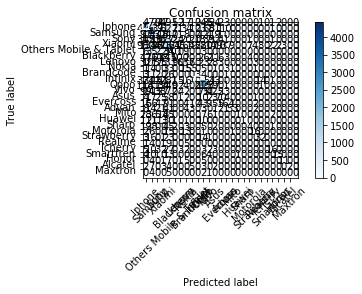

In [89]:
plt.figure()
plot_confusion_matrix(cm,[categories_num.loc[i].values[0] for i in range(31,57)])

## Improving our model

### Data augmentation

If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [144]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [140]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [141]:
ims = np.stack([get_augs() for i in range(6)])

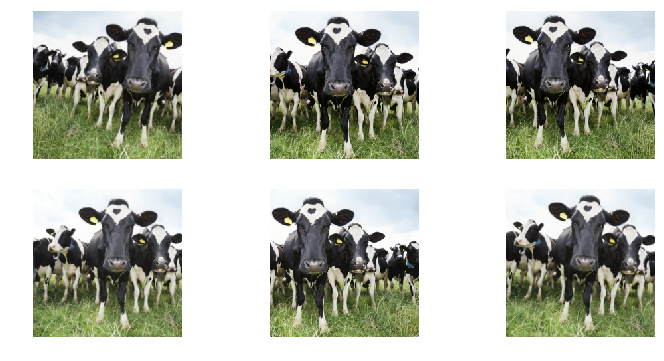

In [142]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [143]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [144]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.355185   0.118832   0.945312  



[array([0.11883]), 0.9453125]

In [145]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [146]:
learn.fit(1e-2, 3, cycle_len=1)

 14%|██████████▏                                                            | 3/21 [00:09<00:58,  3.28s/it, loss=0.135]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.125586   0.114235   0.9375    
    1      0.146203   0.100125   0.953125                                                                              
    2      0.13597    0.108137   0.960938                                                                              



[array([0.10814]), 0.9609375]

What is that `cycle_len` parameter? What we've done here is used a technique called *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

However, we may find ourselves in a part of the weight space that isn't very resilient - that is, small changes to the weights may result in big changes to the loss. We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase the learning rate (this is the 'restarts' in 'SGDR'), which will force the model to jump to a different part of the weight space if the current area is "spikey". Here's a picture of how that might look if we reset the learning rates 3 times (in this paper they call it a "cyclic LR schedule"):

<img src="images/sgdr.png" width="80%">
(From the paper [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

The number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*, and is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

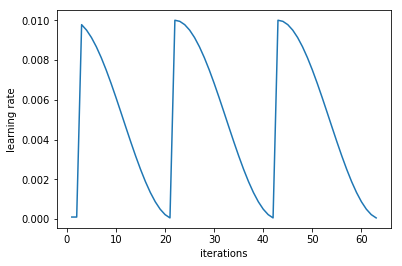

In [147]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.

In [149]:
learn.save('224_lastlayer_cowsheep')

In [150]:
learn.load('224_lastlayer_cowsheep')

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In [151]:
learn.unfreeze()

Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as *differential learning rates*, although there's no standard name for this techique in the literature that we're aware of.

In [152]:
lr=np.array([1e-4,1e-3,1e-2])

In [153]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

 14%|██████████▏                                                            | 3/21 [00:09<00:59,  3.30s/it, loss=0.178]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.179736   0.108525   0.960938  
    1      0.143084   0.081686   0.976562                                                                              
    2      0.116133   0.072817   0.976562                                                                              
    3      0.09932    0.058399   0.96875                                                                               
    4      0.086819   0.048314   0.984375                                                                              
    5      0.073057   0.045161   0.984375                                                                              
    6      0.064944   0.043139   0.984375                                                                              



[array([0.04314]), 0.984375]

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

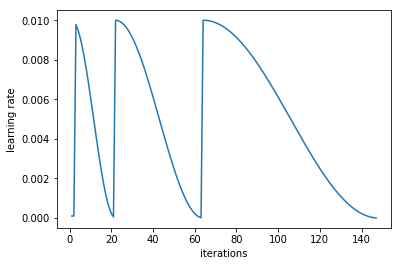

In [154]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [155]:
learn.save('224_all_cowsheep')

In [156]:
learn.load('224_all_cowsheep')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [157]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:07<00:02,  2.64s/it]

C:\Users\user\Anaconda3\envs\fastai\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [108]:
accuracy_np(probs, y)

0.994

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [158]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[50  1]
 [ 0 77]]


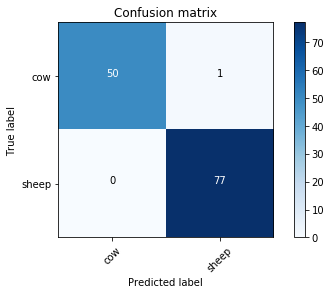

In [160]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect cow


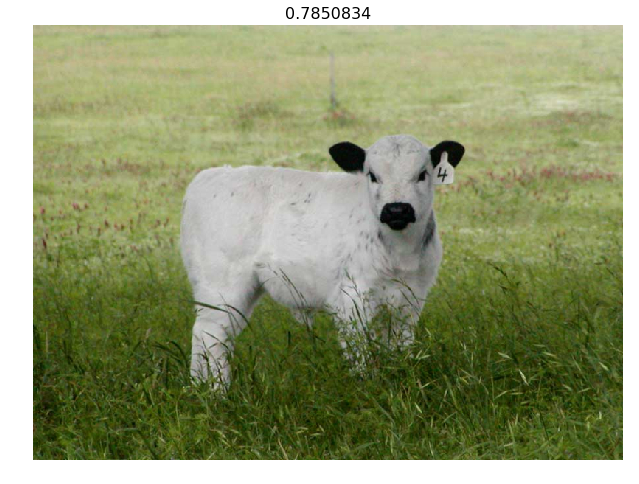

In [163]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cow")

In [164]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect sheep")

Most incorrect sheep


<Figure size 1152x576 with 0 Axes>

## Review: easy steps to train a world-class image classifier

1. Enable data augmentation, and precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## Understanding the code for our first model

Let's look at the Dogs v Cats code line by line.

**tfms** stands for *transformations*. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.

In [114]:
tfms = tfms_from_model(resnet34, sz)

We need a <b>path</b> that points to the dataset. In this path we will also store temporary data and final results. `ImageClassifierData.from_paths` reads data from a provided path and creates a dataset ready for training.

In [115]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions. The pretained model was trained for 1000 classes therfore the final layer predicts a vector of 1000 probabilities. The model for cats and dogs needs to output a two dimensional vector. The diagram below shows in an example how this was done in one of the earliest successful CNNs. The layer "FC8" here would get replaced with a new layer with 2 outputs.

<img src="images/pretrained.png" width="500">
[original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [116]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

*Parameters*  are learned by fitting a model to the data. *Hyparameters* are another kind of parameter, that cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Two examples of hyperparameters are the *learning rate* and the *number of epochs*.

During iterative training of a neural network, a *batch* or *mini-batch* is a subset of training samples used in one iteration of Stochastic Gradient Descent (SGD). An *epoch* is a single pass through the entire training set which consists of multiple iterations of SGD.

We can now *fit* the model; that is, use *gradient descent* to find the best parameters for the fully connected layer we added, that can separate cat pictures from dog pictures. We need to pass two hyperameters: the *learning rate* (generally 1e-2 or 1e-3 is a good starting point, we'll look more at this next) and the *number of epochs* (you can pass in a higher number and just stop training when you see it's no longer improving, then re-run it with the number of epochs you found works well.)

In [117]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.046303   0.026076   0.989     



[array([0.02608]), 0.989]

## Analyzing results: loss and accuracy

When we run `learn.fit` we print 3 performance values (see above.) Here 0.03 is the value of the **loss** in the training set, 0.0226 is the value of the loss in the validation set and 0.9927 is the validation accuracy. What is the loss? What is accuracy? Why not to just show accuracy?

**Accuracy** is the ratio of correct prediction to the total number of predictions.

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1.

In [118]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [119]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting cats and dogs. Exercise: play with `preds` to get a lower loss for this example. 

**Example:** Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

`loss = -log(0.9) = 0.10`

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss should be much larger.

loss = -log(1-0.9) = 2.30

- Exercise: look at the other cases and convince yourself that this make sense.
- Exercise: how would you rewrite `binary_loss` using `if` instead of `*` and `+`?

Why not just maximize accuracy? The binary classification loss is an easier function to optimize.